#### Download the data from the homework 5 data folder. Train a logistic regression predicting who would survive with titanic.train.csv. Test to see your accuracy on titanic.test.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
train = pd.read_csv("titanic.train.csv")
test = pd.read_csv("titanic.test.csv")

In [5]:
test.drop(columns=['home.dest'], inplace=True)
train.drop(columns=['boat','home.dest'], inplace=True)

In [6]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body
0,3,1,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.50,NaN,S,NaN
1,2,1,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.00,NaN,S,NaN
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.60,C2,S,NaN
3,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S,269.0
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.95,NaN,Q,NaN


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   survived  891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       698 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      890 non-null    float64
 9   cabin     189 non-null    object 
 10  embarked  890 non-null    object 
 11  body      82 non-null     float64
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  418 non-null    int64  
 1   pclass      418 non-null    int64  
 2   survived    418 non-null    int64  
 3   name        418 non-null    object 
 4   sex         418 non-null    object 
 5   age         348 non-null    float64
 6   sibsp       418 non-null    int64  
 7   parch       418 non-null    int64  
 8   ticket      418 non-null    object 
 9   fare        418 non-null    float64
 10  cabin       106 non-null    object 
 11  embarked    417 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body
0,3,1,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.50,NaN,S,NaN
1,2,1,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.00,NaN,S,NaN
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.60,C2,S,NaN
3,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S,269.0
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.95,NaN,Q,NaN


Text(0, 0.5, 'Count')

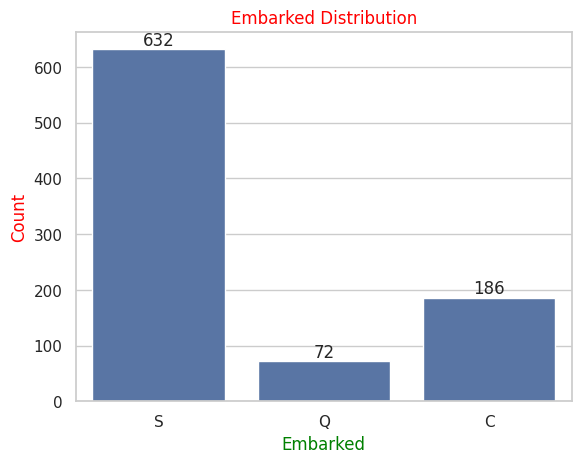

In [10]:
ax = sns.set(style="whitegrid")
ax = sns.countplot(data=train,x='embarked');
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution',color='Red',loc='center')
plt.xlabel('Embarked',color='Green',loc='center',)
plt.ylabel('Count',color='Red',loc='center')

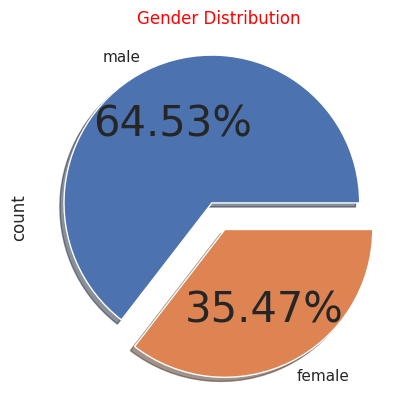

In [11]:
plt.rcParams.update({'font.size': 30})
train['sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center');

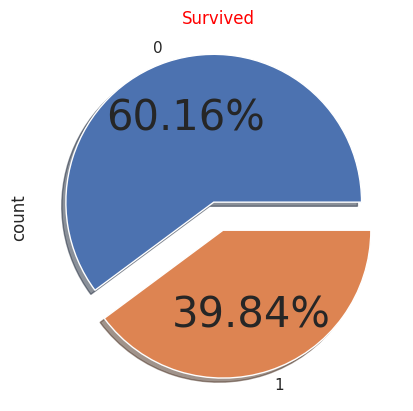

In [12]:
plt.rcParams.update({'font.size': 30})
train['survived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center');

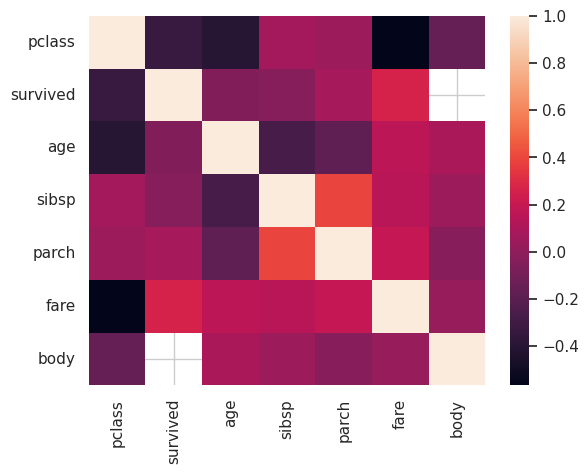

In [13]:
columns=['pclass',
         'survived',
         'age','sibsp',
         'parch','fare','body']
sns.heatmap(train[columns].corr())
plt.show()

In [14]:
hig_corr = train[columns].corr()
hig_corr_features = hig_corr.index[abs(hig_corr["fare"]) >= 0.25]
hig_corr_features

Index(['pclass', 'survived', 'fare'], dtype='object')

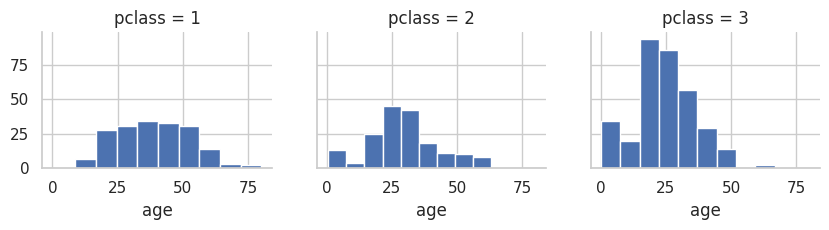

In [15]:
g = sns.FacetGrid(train, col="pclass")
g = g.map(plt.hist, "age")

In [16]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

In [17]:
missing_value(train)

,Missing Number,Missing Percentage
body,809,90.80
cabin,702,78.79
age,193,21.66
fare,1,0.11
embarked,1,0.11


In [18]:
train['age'] = train['age'].fillna(train['age'].mean())
train['fare'] = train['fare'].fillna(train['fare'].mean())
train['embarked'] = train['embarked'].fillna(method='bfill')

test['age'] = test['age'].fillna(train['age'].mean())
test['fare'] = test['fare'].fillna(train['fare'].mean())
test['embarked'] = test['embarked'].fillna(method='bfill')

In [19]:
train.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       702
embarked      0
body        809
dtype: int64

In [20]:
train = pd.get_dummies(train,columns=['sex','embarked'], drop_first=True)
test = pd.get_dummies(test,columns=['sex','embarked'], drop_first=True)
train.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,body,sex_male,embarked_Q,embarked_S
0,3,1,"Sheerlinck, Mr. Jan Baptist",29.0,0,0,345779,9.50,NaN,NaN,True,False,True
1,2,1,"Quick, Miss. Winifred Vera",8.0,1,1,26360,26.00,NaN,NaN,False,False,True
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,113776,66.60,C2,NaN,False,False,True
3,1,0,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.00,B22,269.0,True,False,True
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",30.0,0,0,382650,6.95,NaN,NaN,False,True,False


In [21]:
from sklearn.cluster import KMeans
age_data = train[['age','survived']].dropna()
kmeans = KMeans(n_clusters=4, random_state=0).fit(age_data)
age_group = kmeans.labels_
age_data['age bin'] = age_group
age_min = age_data.groupby('age bin')['age'].min().reset_index()
age_min.rename(columns={'age': 'minimum age'}, inplace=True)
age_max = age_data.groupby('age bin')['age'].max().reset_index()
age_max.rename(columns={'age': 'maximum age'}, inplace=True)
age_bins = pd.merge(age_min, age_max, on='age bin')

train.loc[(train['age'] > 13) & (train['age'] <= 28), 'age bin'] = 'b. (13,28]'
train.loc[(train['age'] > 28) & (train['age'] <= 44), 'age bin'] = 'c. (28,44]'
train.loc[train['age'] > 44, 'age bin'] = 'd. (44,80]'
train.loc[train['age'].isna(), 'age bin'] = 'e. null'

test.loc[(test['age'] > 13) & (test['age'] <= 28), 'age bin'] = 'b. (13,28]'
test.loc[(test['age'] > 28) & (test['age'] <= 44), 'age bin'] = 'c. (28,44]'
test.loc[test['age'] > 44, 'age bin'] = 'd. (44,80]'
test.loc[test['age'].isna(), 'age bin'] = 'e. null'

fare_data = train[['fare','survived']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(fare_data)
fare_group = kmeans.labels_
fare_data['fare bin'] = fare_group

# Create a new variable 'fare bin'
train.loc[(train['fare'] == 0), 'fare bin'] = 0
train.loc[(train['fare'] > 0) &
             (train['fare'] < 48), 'fare bin'] = 1
train.loc[train['fare'] >= 48, 'fare bin'] = 2

test.loc[(test['fare'] == 0), 'fare bin'] = 0
test.loc[(test['fare'] > 0) &
             (test['fare'] < 48), 'fare bin'] = 1
test.loc[test['fare'] >= 48, 'fare bin'] = 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-6494d832c794>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare_data['fare bin'] = fare_group


In [22]:
same_ticket = train.groupby('ticket')['name'].nunique().reset_index()
same_ticket.rename(columns={'name': 'passenger count'}, inplace=True)

# Create a new variable 'travel size'
travel_group_2ppl = same_ticket[same_ticket['passenger count'] == 2]
travel_group_3ppl = same_ticket[same_ticket['passenger count'] == 3]
travel_group_4ppl = same_ticket[same_ticket['passenger count'] == 4]
travel_group_5ppl = same_ticket[same_ticket['passenger count'] >= 5]

train['travel size'] = 'a. alone'
train.loc[train['ticket'].isin(travel_group_2ppl['ticket']),
             'travel size'] = 'b. 2 ppl'
train.loc[train['ticket'].isin(travel_group_3ppl['ticket']),
             'travel size'] = 'c. 3 ppl'
train.loc[train['ticket'].isin(travel_group_4ppl['ticket']),
             'travel size'] = 'd. 4 ppl'
train.loc[train['ticket'].isin(travel_group_5ppl['ticket']),
             'travel size'] = 'e. 5+ ppl'

# Survival rate by travel size
train.groupby(['travel size'])['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
travel size,,,,,,,,
a. alone,580.0,0.329310,0.470368,0.0,0.0,0.0,1.0,1.0
b. 2 ppl,146.0,0.554795,0.498699,0.0,0.0,1.0,1.0,1.0
c. 3 ppl,78.0,0.628205,0.486412,0.0,0.0,1.0,1.0,1.0
d. 4 ppl,36.0,0.583333,0.500000,0.0,0.0,1.0,1.0,1.0
e. 5+ ppl,51.0,0.254902,0.440143,0.0,0.0,0.0,0.5,1.0


In [23]:
same_ticket = test.groupby('ticket')['name'].nunique().reset_index()
same_ticket.rename(columns={'name': 'passenger count'}, inplace=True)

# Create a new variable 'travel size'
travel_group_2ppl = same_ticket[same_ticket['passenger count'] == 2]
travel_group_3ppl = same_ticket[same_ticket['passenger count'] == 3]
travel_group_4ppl = same_ticket[same_ticket['passenger count'] == 4]
travel_group_5ppl = same_ticket[same_ticket['passenger count'] >= 5]

test['travel size'] = 'a. alone'
test.loc[test['ticket'].isin(travel_group_2ppl['ticket']),
             'travel size'] = 'b. 2 ppl'
test.loc[test['ticket'].isin(travel_group_3ppl['ticket']),
             'travel size'] = 'c. 3 ppl'
test.loc[test['ticket'].isin(travel_group_4ppl['ticket']),
             'travel size'] = 'd. 4 ppl'
test.loc[test['ticket'].isin(travel_group_5ppl['ticket']),
             'travel size'] = 'e. 5+ ppl'

# Survival rate by travel size
test.groupby(['travel size'])['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
travel size,,,,,,,,
a. alone,322.0,0.310559,0.463443,0.0,0.0,0.0,1.00,1.0
b. 2 ppl,64.0,0.531250,0.502967,0.0,0.0,1.0,1.00,1.0
c. 3 ppl,24.0,0.375000,0.494535,0.0,0.0,0.0,1.00,1.0
d. 4 ppl,8.0,0.250000,0.462910,0.0,0.0,0.0,0.25,1.0


In [24]:
train.loc[(train['travel size'] == 'a. alone') &
             (train['sibsp'] == 1), 'travel size'] = 'b. 2 ppl'
train.loc[(train['travel size'] == 'a. alone') &
             (train['sibsp'] == 2), 'travel size'] = 'c. 3 ppl'
train.loc[(train['travel size'] == 'a. alone') &
             (train['sibsp'] == 4), 'travel size'] = 'e. 5+ ppl'
train.loc[(train['travel size'] == 'b. 2 ppl') &
             (train['sibsp'] == 2), 'travel size'] = 'c. 3 ppl'
train.loc[(train['travel size'] == 'b. 2 ppl') &
             (train['sibsp'] == 3), 'travel size'] = 'd. 4 ppl'
train.loc[(train['travel size'] == 'c. 3 ppl') &
             (train['sibsp'] == 3), 'travel size'] = 'd. 4 ppl'


test.loc[(test['travel size'] == 'a. alone') &
             (test['sibsp'] == 1), 'travel size'] = 'b. 2 ppl'
test.loc[(test['travel size'] == 'a. alone') &
             (test['sibsp'] == 2), 'travel size'] = 'c. 3 ppl'
test.loc[(test['travel size'] == 'a. alone') &
             (test['sibsp'] == 4), 'travel size'] = 'e. 5+ ppl'
test.loc[(test['travel size'] == 'b. 2 ppl') &
             (test['sibsp'] == 2), 'travel size'] = 'c. 3 ppl'
test.loc[(test['travel size'] == 'b. 2 ppl') &
             (test['sibsp'] == 3), 'travel size'] = 'd. 4 ppl'
test.loc[(test['travel size'] == 'c. 3 ppl') &
             (test['sibsp'] == 3), 'travel size'] = 'd. 4 ppl'

In [25]:
train.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,body,sex_male,embarked_Q,embarked_S,age bin,fare bin,travel size
0,3,1,"Sheerlinck, Mr. Jan Baptist",29.0,0,0,345779,9.50,NaN,NaN,True,False,True,"c. (28,44]",1.0,a. alone
1,2,1,"Quick, Miss. Winifred Vera",8.0,1,1,26360,26.00,NaN,NaN,False,False,True,NaN,1.0,c. 3 ppl
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,113776,66.60,C2,NaN,False,False,True,"b. (13,28]",2.0,b. 2 ppl
3,1,0,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.00,B22,269.0,True,False,True,"d. (44,80]",2.0,b. 2 ppl
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",30.0,0,0,382650,6.95,NaN,NaN,False,True,False,"c. (28,44]",1.0,a. alone


In [26]:
# Travel group type
train.loc[train['travel size'] == 'a. alone',
             'travel type'] = 'a. alone'
train.loc[(train['travel size']!= 'a. alone')
             & (train['sibsp'] + train['parch'] > 1), 'travel type'] = 'b. with family'
train.loc[(train['travel size']!='a. alone')
             & (train['sibsp'] + train['parch'] == 1), 'travel type'] = 'c. with friend'

# Survival rate by travel type
train.groupby(['travel type'])['survived'].describe()

# Travel group type
test.loc[test['travel size'] == 'a. alone',
             'travel type'] = 'a. alone'
test.loc[(test['travel size']!= 'a. alone')
             & (test['sibsp'] + test['parch'] > 1), 'travel type'] = 'b. with family'
test.loc[(test['travel size']!='a. alone')
             & (test['sibsp'] + test['parch'] == 1), 'travel type'] = 'c. with friend'

# Survival rate by travel type
test.groupby(['travel type'])['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
travel type,,,,,,,,
a. alone,252.0,0.253968,0.436146,0.0,0.0,0.0,1.0,1.0
b. with family,85.0,0.435294,0.498738,0.0,0.0,0.0,1.0,1.0
c. with friend,58.0,0.517241,0.504067,0.0,0.0,1.0,1.0,1.0


In [27]:
train['title'] = train['name'
                            ].apply(lambda x: x[x.find(', ')+2 : x.find('.')])
train['title'].value_counts()


test['title'] = test['name'
                            ].apply(lambda x: x[x.find(', ')+2 : x.find('.')])
test['title'].value_counts()

title
Mr              243
Miss             79
Mrs              66
Master           20
Dr                2
Mlle              2
Ms                2
Col               1
Don               1
the Countess      1
Rev               1
Name: count, dtype: int64

In [28]:
train['title group'] = 'other'

for t in ['Mr','Miss','Mrs','Master']:
  train.loc[train['title'] == t, 'title group'] = t

# Survival rate by title group
train.groupby(['title group'])['survived'].describe()


test['title group'] = 'other'

for t in ['Mr','Miss','Mrs','Master']:
  test.loc[train['title'] == t, 'title group'] = t

# Survival rate by title group
test.groupby(['title group'])['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
title group,,,,,,,,
Master,24.0,0.291667,0.464306,0.0,0.0,0.0,1.0,1.0
Miss,87.0,0.310345,0.465317,0.0,0.0,0.0,1.0,1.0
Mr,229.0,0.366812,0.482990,0.0,0.0,0.0,1.0,1.0
Mrs,66.0,0.333333,0.475017,0.0,0.0,0.0,1.0,1.0
other,12.0,0.416667,0.514929,0.0,0.0,0.0,1.0,1.0


In [29]:
train = train.copy()
train.drop(columns=['name','age','sibsp','parch','ticket','fare','cabin','body','title'], inplace=True)

test.drop(columns=['name','age','sibsp','parch','ticket','fare','cabin','title'], inplace=True)

test.head()

,Unnamed: 0,pclass,survived,sex_male,embarked_Q,embarked_S,age bin,fare bin,travel size,travel type,title group
0,0,3,0,False,False,True,"c. (28,44]",2.0,d. 4 ppl,b. with family,Mr
1,1,3,0,True,False,True,"b. (13,28]",1.0,a. alone,a. alone,Miss
2,2,3,0,True,False,True,"b. (13,28]",1.0,a. alone,a. alone,Mrs
3,3,1,1,False,False,False,"c. (28,44]",2.0,b. 2 ppl,c. with friend,other
4,4,1,0,True,False,False,"d. (44,80]",2.0,a. alone,a. alone,Miss


In [30]:
data_dummies = pd.get_dummies(train)
data_dummies.drop(columns=['age bin_d. (44,80]','travel type_c. with friend',
                           'title group_Mr',
                           'title group_Miss','title group_Mrs',
                           'title group_Master'], inplace=True)
data_dummies.head()

,pclass,survived,sex_male,embarked_Q,embarked_S,fare bin,"age bin_b. (13,28]","age bin_c. (28,44]",travel size_a. alone,travel size_b. 2 ppl,travel size_c. 3 ppl,travel size_d. 4 ppl,travel size_e. 5+ ppl,travel type_a. alone,travel type_b. with family,title group_other
0,3,1,True,False,True,1.0,False,True,True,False,False,False,False,True,False,False
1,2,1,False,False,True,1.0,False,False,False,False,True,False,False,False,True,False
2,1,1,False,False,True,2.0,True,False,False,True,False,False,False,False,False,False
3,1,0,True,False,True,2.0,False,False,False,True,False,False,False,False,True,True
4,3,1,False,True,False,1.0,False,True,True,False,False,False,False,True,False,False


In [31]:
drop_col = [col for col in data_dummies.columns if 'travel type' in col]
data_dummies.drop(columns=drop_col, inplace=True)

In [32]:
X = data_dummies.drop(['survived'],axis=1)
y = data_dummies['survived']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

learning_rate = 0.01  # Learning rate
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train)
print("Model Accuracy Score :",log_accuracy)

Training Accuracy    : 77.81
Model Accuracy Score : 81.56


In [36]:
test_dummies = pd.get_dummies(test)
test_dummies.drop(columns=['age bin_d. (44,80]','travel type_c. with friend',
                           'title group_Mr',
                           'title group_Miss','title group_Mrs',
                           'title group_Master'], inplace=True)
drop_col = [col for col in test_dummies.columns if 'travel type' in col]
test_dummies.drop(columns=drop_col, inplace=True)
test_dummies.head()


,Unnamed: 0,pclass,survived,sex_male,embarked_Q,embarked_S,fare bin,"age bin_b. (13,28]","age bin_c. (28,44]",travel size_a. alone,travel size_b. 2 ppl,travel size_c. 3 ppl,travel size_d. 4 ppl,travel size_e. 5+ ppl,title group_other
0,0,3,0,False,False,True,2.0,False,True,False,False,False,True,False,False
1,1,3,0,True,False,True,1.0,True,False,True,False,False,False,False,False
2,2,3,0,True,False,True,1.0,True,False,True,False,False,False,False,False
3,3,1,1,False,False,False,2.0,False,True,False,True,False,False,False,True
4,4,1,0,True,False,False,2.0,False,False,True,False,False,False,False,False


In [37]:
logreg.fit(X, y)
test_X = test_dummies.drop(columns=['survived'])
test_y = test['survived']
test_X.drop(columns=['Unnamed: 0'], inplace=True)
test_pred = logreg.predict(test_X)
log_test_accuracy = round(accuracy_score(test_pred, test_y) * 100, 2)
print("Model Accuracy Score :",log_test_accuracy)

Model Accuracy Score : 77.03


#### For this question, submit a plot of your loss curve and print your overall accuracy on training and test sets.

In [68]:
X = X.astype(float)
test_X = test_X.astype(float)

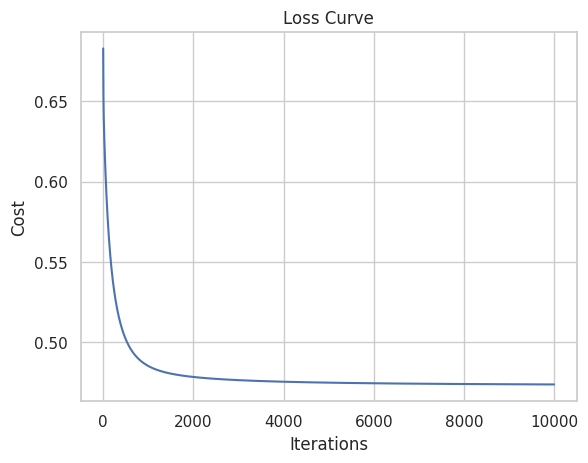

Training Accuracy: 0.7833894500561167
Test Accuracy: 0.7607655502392344


In [77]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5
    cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * X.T.dot(h - y)
        theta -= learning_rate * gradient
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

def predict(X, theta):
    h = sigmoid(X.dot(theta))
    return np.round(h)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Assuming X, y, and test_data are already defined

# Add bias term to X
X_train = np.c_[np.ones((X.shape[0], 1)), X]
X_test = np.c_[np.ones((test_X.shape[0], 1)), test_X]

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.05
iterations = 10000

# Train the model
theta_final, cost_history = gradient_descent(X_train, y, theta, learning_rate, iterations)

# Plot loss curve
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss Curve')
plt.show()

train_predictions = predict(X_train, theta_final)
test_predictions = predict(X_test, theta_final)

train_accuracy = accuracy(y, train_predictions)
test_accuracy = accuracy(test_y, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

#### Using a toolbox (like Keras), try benchmarking your logistic regression and then adding a few more layers (i.e., a neural network). Diagram your neural network architecture and print out your overall test set accuracy. Make sure you do not train on any samples from your test set.

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid')
])

logistic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
logistic_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate on test set
test_loss, test_accuracy = logistic_model.evaluate(test_X, test_y)
print("Test Accuracy (Logistic Regression):", test_accuracy)

Epoch 1/100
12/12 [==============================] - 2s 35ms/step - loss: 0.7641 - accuracy: 0.5056 - val_loss: 0.7524 - val_accuracy: 0.5475
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7591 - accuracy: 0.5084 - val_loss: 0.7479 - val_accuracy: 0.5363
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7543 - accuracy: 0.5084 - val_loss: 0.7434 - val_accuracy: 0.5363
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7496 - accuracy: 0.5042 - val_loss: 0.7388 - val_accuracy: 0.5363
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7454 - accuracy: 0.5267 - val_loss: 0.7345 - val_accuracy: 0.5587
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7414 - accuracy: 0.5365 - val_loss: 0.7306 - val_accuracy: 0.5587
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7375 - accuracy: 0.5506 - val_loss: 0.7264 - val_accuracy: 0.5642
Epoch 8/100


In [75]:
# Build neural network model
neural_network_model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
neural_network_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
neural_network_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# Evaluate on test set
test_loss, test_accuracy = neural_network_model.evaluate(test_X, test_y)
print("Test Accuracy (Neural Network):", test_accuracy)


Epoch 1/100
12/12 [==============================] - 2s 41ms/step - loss: 0.6637 - accuracy: 0.5758 - val_loss: 0.6536 - val_accuracy: 0.5866
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6236 - accuracy: 0.6264 - val_loss: 0.6285 - val_accuracy: 0.6257
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6021 - accuracy: 0.6784 - val_loss: 0.6056 - val_accuracy: 0.6704
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5822 - accuracy: 0.7107 - val_loss: 0.5842 - val_accuracy: 0.6760
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5618 - accuracy: 0.7205 - val_loss: 0.5630 - val_accuracy: 0.7095
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5426 - accuracy: 0.7388 - val_loss: 0.5434 - val_accuracy: 0.6983
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5253 - accuracy: 0.7500 - val_loss: 0.5198 - val_accuracy: 0.7654
Epoch 8/10